In [1]:
import pandas as pd

from funciones_OD import *

ruta = "F:/PhD/Datos SIATA/Análisis/Descriptivo/"
archivo = "DF"
sensor = "pm25"
redondeo = 4
datos = pd.read_csv(ruta+"test_"+archivo+"_outliers_N.csv",sep=",")
#datos = pd.read_csv(ruta+"test_outliers.csv",sep=",")

variables = ['pm25']#,'humedad_relativa', 'temperatura'
for sensor in variables:
    datos[sensor] = pd.Series([round(val,redondeo) for val in datos[sensor]])


In [2]:
pd.options.mode.chained_assignment = None  # default='warn' --- Para quitar los warnings
datos2 = datos.copy()
datos2=datos2.assign(Percentile="N") # Se agrega columna vacia
ident_outliers = pd.DataFrame()

fechas = datos2.fecha.unique().tolist()
nodos = datos2.codigoSerial.unique().tolist()
percentil = 90
margen = 10

#cont=1
for i in nodos:
    print("Nodo:",i, "Faltan:", (len(nodos)-nodos.index(i))-1)
    #print("Conteo:",cont)
    fild = datos2.loc[datos2.loc[:,"codigoSerial"] == i]
    
    for j in fechas:
       
        fil = fild.loc[fild.loc[:,"fecha"] == j]
        fil.reset_index(inplace=True, drop=True)
        
        if (len(fil)<=0):
            #print("No hay datos del nodo", i, "en la fecha", j)
            continue
        
        for sensor in variables:
            percen = np.percentile(fil[sensor],[percentil])
            #print(percen)
        
            for k in range(1,len(fil)):
                #cont += 1
                if (fil[sensor][k] > percen) and ((abs(fil[sensor][k] - fil[sensor][k-1])>margen) or (fil['Percentile'][k-1] == "S")):
                    #print("yo")
                    fil.loc[k,('Percentile')]= "S"
                              
                
                        
        ident_outliers = pd.concat([ident_outliers,fil],ignore_index=True)

matrix_conf (ident_outliers,'Percentile')

Nodo: 2 Faltan: 0
TP: 3528 TN: 34507 FP: 176 FN: 326
Total values: 38537
*************************************
Precision: 0.9524838012958964
Recall: 0.915412558380903
F1: 0.9335803122519185
Accuracy: 0.9869735578794405



(34507, 326, 176, 3528)

(0.9869735578794405, 0.915412558380903, 0.9524838012958964, 0.9335803122519185)

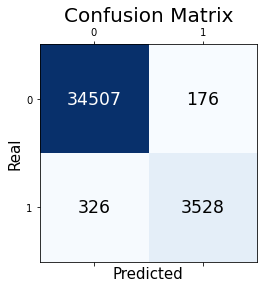

In [4]:
real = ident_outliers.pm25_outlier.tolist()
real = ['S' if value!='N' else value for value in real]
predicho = ident_outliers.Percentile.tolist()
confu_matrix (real,predicho)

C:\Users\FERNAN~1\AppData\Local\Temp/ipykernel_17112/195357138.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = ident_outliers[0:300][ident_outliers['Percentile'] == 'S']
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


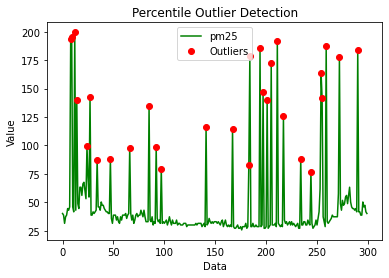

In [7]:
outliers = ident_outliers[0:300][ident_outliers['Percentile'] == 'S']
plt.plot(ident_outliers[0:300].index, ident_outliers[0:300].pm25, color="green",label="pm25")
plt.plot(outliers.index, outliers.pm25, 'o', color="red",label="Outliers")
plt.title('Percentile Outlier Detection')
plt.legend(loc='upper center')
plt.xlabel('Data')
plt.ylabel('Value')
plt.savefig("Percent_result.eps", dpi=200, bbox_inches='tight') 
plt.show()